In [2]:
from sklearn.datasets import load_iris
iris = load_iris() #引入iris資料庫
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
import pandas as pd
df = pd.DataFrame(iris["data"],columns=iris['feature_names']) #將iris資料化為表格
df["target"] = iris["target"] #加上target直行
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<AxesSubplot:>

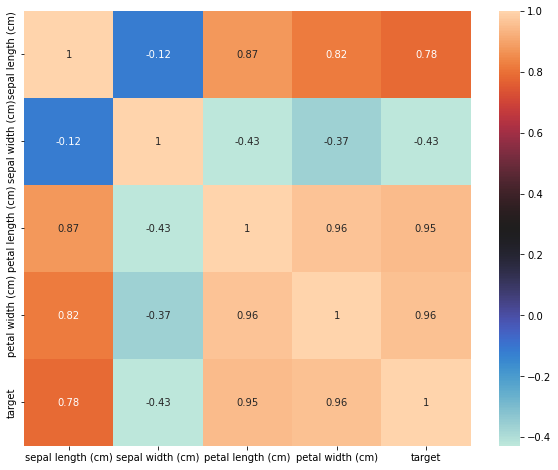

In [4]:
import matplotlib.pyplot as plt #畫圖函式庫
import seaborn as sns #熱點圖函式庫
%matplotlib inline
df.astype("float") #表格內數值轉浮點數
plt.figure(figsize = (10,8)) #調整資料顯示大小
sns.heatmap(df.corr(),cmap="icefire",annot = True) #將資料以熱點圖呈現

In [5]:
from sklearn.model_selection import train_test_split #訓練函式庫
#指定變數給訓練資料與測試資料
x_train,x_test,y_train,y_test = train_test_split(df.drop(["target"], axis = 1) , df["target"],test_size = 0.1) 


In [6]:
from sklearn.tree import DecisionTreeClassifier #決策樹函式庫
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x_train,y_train) #訓練模型


DecisionTreeClassifier(max_depth=3)

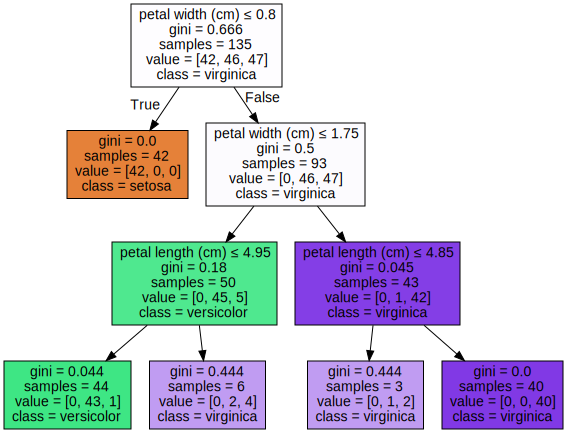

In [7]:
from sklearn.tree import export_graphviz #輸出graphviz函式庫
import graphviz
g = export_graphviz(clf, out_file = None, feature_names = iris["feature_names"], class_names = iris["target_names"],filled = True,special_characters = True)
graph = graphviz.Source(g) #將graphviz資料化為決策樹
graph

In [8]:
pre = clf.predict(x_test) #建立預測結果
print(list(pre))
list(y_test)

[0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0, 1, 2]


[0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0, 1, 2]

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(pre,y_test) #算出預測精準度

1.0

In [10]:
from sklearn.metrics import confusion_matrix
CD = confusion_matrix(y_test, pre) #將預測結果化為混淆矩陣
pd.DataFrame(CD) #以Pandas進行處理

,0,1,2
0,8,0,0
1,0,4,0
2,0,0,3
